In [23]:
import  numpy as np
# import  scipy # from    scipy.optimize import curve_fit # from    scipy.stats import ks_2samp

In [2]:
def landau(x, *par):
    w = x - par[0]
    return par[1]*np.exp(-(w+np.exp(-par[4]*w))/par[2])+par[3]

In [24]:
import  numpy as np
from numpy import loadtxt
map = loadtxt('map.csv', delimiter=',',dtype="i8")

In [25]:
def find_index(n):
    for i in range(0,8):
        for j in range(0,8):
            if map[i][j]==n:
                return (i,j)
    return (None, None)

In [36]:
infile = 'test.npy'
with open(infile, 'rb') as f: X = np.load(f)
print(f'''Read an array: {X.shape}''')

Read an array: (105045, 64, 32)


In [37]:
import ipywidgets as widgets
from IPython.display import display
w = widgets.IntSlider(min=0, max=63, description='Channel')
display(w)


IntSlider(value=0, description='Channel', max=63)

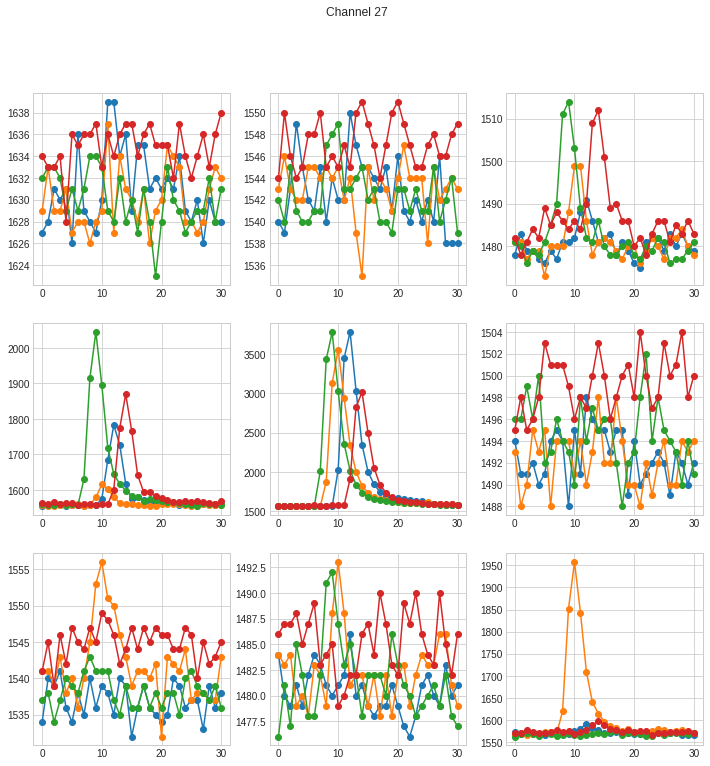

In [53]:
import  matplotlib.pyplot as plt

channel = w.value
x = np.linspace(0, 31, 31, endpoint=False)
# print('Linspace:', x)
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,10)

x1 = np.linspace(0, 30, 300, endpoint=False)

first   = True
cnt     = 0

(fig, panels) = plt.subplots(3,3)

fig.set_size_inches(12.0, 12.0)
fig.suptitle(f'''Channel {channel}''')

for i in range(0,1000):
    wave        =   X[i][channel][:31]
    pedestal    =   np.average(wave[0:5]) # print(wave) print(pedestal)
    std         =   np.std(wave[0:5])

    if(pedestal>1700 or std>7): continue
    maxindex    =   np.argmax(wave[2:20])
    maxval      =   wave[maxindex]

    if maxval > 1700:
        panels[1][1].plot(x, wave, 'o', linestyle='solid')
        cnt+=1

        coord = find_index(channel)

        if coord[0]>0:
            channel_n = map[coord[0]-1][coord[1]]
            # print(channel_n)
            wave_n = X[i][channel_n][:31]
            panels[0][1].plot(x, wave_n, 'o', linestyle='solid')

            if coord[1]>0:
                channel_nw = map[coord[0]-1][coord[1]-1]
                wave_nw = X[i][channel_nw][:31]
                panels[0][0].plot(x, wave_nw, 'o', linestyle='solid')

            if coord[1]<7:
                channel_ne = map[coord[0]-1][coord[1]+1]
                wave_ne = X[i][channel_ne][:31]
                panels[0][2].plot(x, wave_ne, 'o', linestyle='solid')

        if coord[1]>0:
            channel_w = map[coord[0]][coord[1]-1]
            wave_w = X[i][channel_w][:31]
            panels[1][0].plot(x, wave_w, 'o', linestyle='solid')

        if coord[1]<7:
            channel_e = map[coord[0]][coord[1]+1]
            wave_e = X[i][channel_e][:31]
            panels[1][2].plot(x, wave_e, 'o', linestyle='solid')


        if coord[0]<7:
            channel_s = map[coord[0]+1][coord[1]]
            #print(channel_s)
            wave_s = X[i][channel_s][:31]
            panels[2][1].plot(x, wave_s, 'o', linestyle='solid')

            if coord[1]>0:
                channel_sw = map[coord[0]+1][coord[1]-1]
                wave_sw = X[i][channel_sw][:31]
                panels[2][0].plot(x, wave_sw, 'o', linestyle='solid')

            if coord[1]<7:
                channel_se = map[coord[0]+1][coord[1]+1]
                wave_se = X[i][channel_se][:31]
                panels[2][2].plot(x, wave_se, 'o', linestyle='solid')

        if cnt>3: break



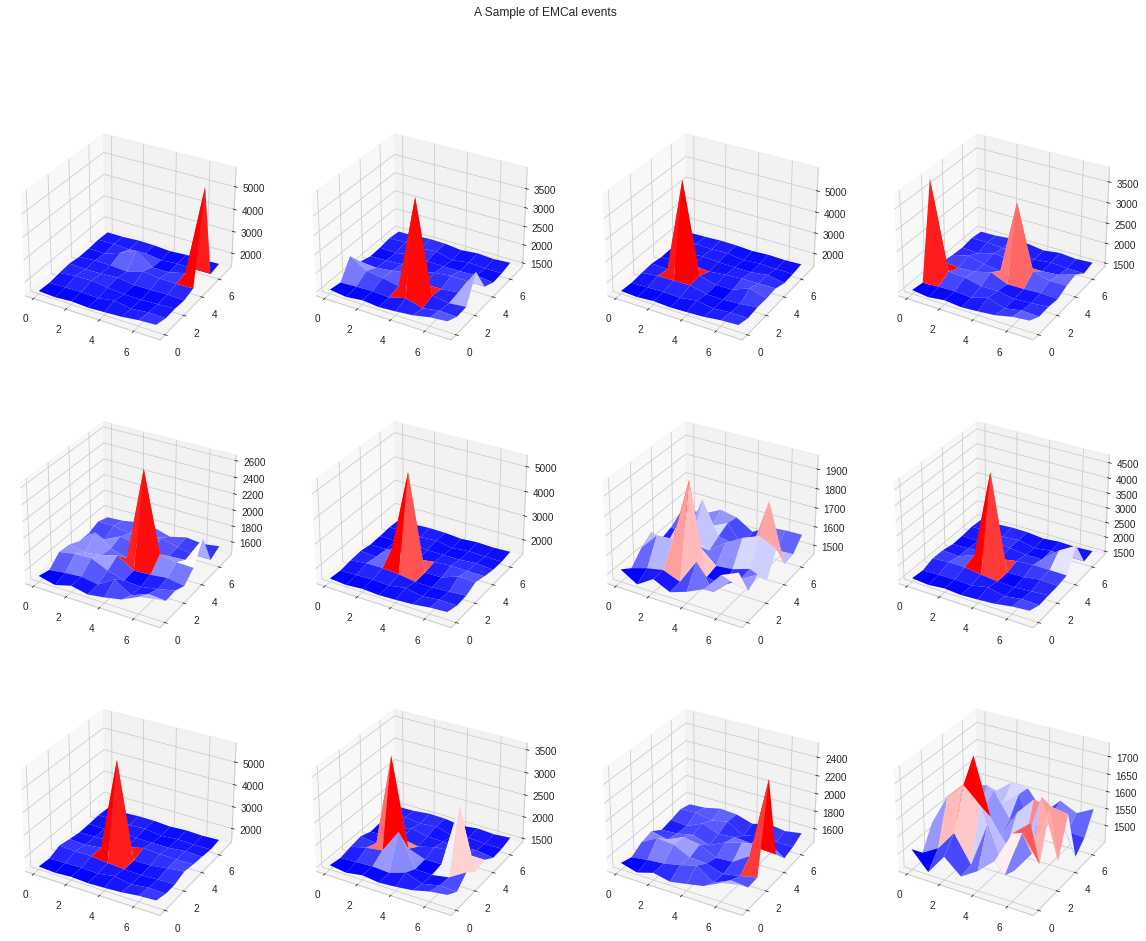

In [59]:
from matplotlib import cm
channel = w.value
(fig, panels) = plt.subplots(3,4, subplot_kw={'projection': '3d'})

fig.set_size_inches(20.0, 15.0)
fig.suptitle(f'''A Sample of EMCal events''')

x_ = np.arange(0,8)
y_ = np.arange(0,8)
x_, y_ = np.meshgrid(x_, y_)

face = np.zeros(shape=(8,8), dtype=np.int32)
cnt=0
ip = 0
jp = 0
for n in range(0,5000):
    for i in range(0,8):
        for j in range(0,8):
            channel = map[i][j]
            wave = X[n][channel][:31]
            peak = np.amax(wave)
            face[i][j] = peak
    
    maxface = np.amax(face)
    if maxface<1700: continue
    cnt+=1
    if cnt<37: continue
    #panels[ip][jp].imshow(face, cmap="viridis")

    panels[ip][jp].plot_surface(x_, y_, face, cmap=cm.bwr)
    # panels[ip][jp].axis('off')
    jp+=1
    if jp==4:
        jp=0
        ip+=1

    if ip==3: break

[[1520 1469 1528 1484 1516 1559 1652 1695]
 [1482 1507 1526 1495 1620 1491 1575 1557]
 [1545 1640 1648 1560 1495 1483 1524 1566]
 [1592 1551 1585 1691 1510 1522 1554 1514]
 [1507 1519 1559 1599 1586 1637 1642 1641]
 [1526 1501 5443 1656 1527 1527 2032 1659]
 [1565 1573 1537 1578 1465 1538 1508 1512]
 [1527 1537 1581 1568 1511 1564 1682 1580]]


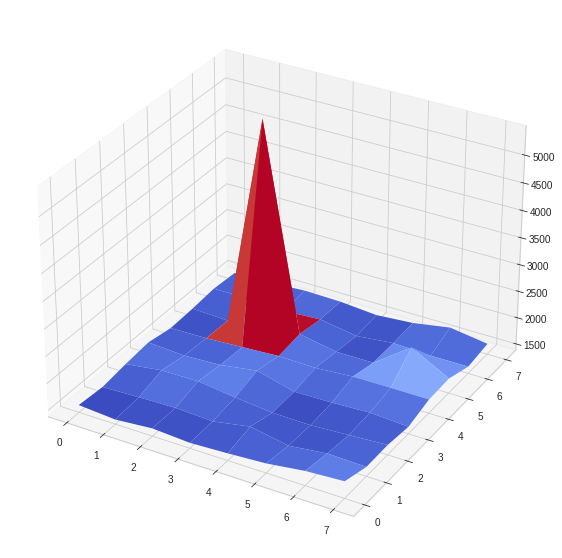

In [19]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(face)

# Make data.
X = np.arange(0,8)
Y = np.arange(0,8)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
Z = face
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
#dx = dy = np.ones_like(Z)
#dz = Z.ravel()
#surf = ax.bar3d(X, Y, Z, dx, dy, dz)

In [ ]:
guess = [
    1000,    # vertical scale
    10,     # time
    2,      # p2
    10,      # p3
    1500,   # pedestal
    10,     # p5
    10       # p6
    ]


##   popt, _ = scipy.optimize.curve_fit(landau, x, wave[i], p0=[10, 200, 10, 1500,1 ]) # , p0=guess)
    # print(popt)
##    plt.plot(x1, landau(x1, *popt))

    # residual sum of squares
##    ss_res = np.sum((wave[i] - landau(x, *popt)) ** 2)

    # total sum of squares
##    ss_tot = np.sum((wave[i] - np.mean(wave[i])) ** 2)

    # r-squared
##    r2 = 1 - (ss_res / ss_tot)


    #perform Kolmogorov-Smirnov test
##   ks = ks_2samp(wave[i], landau(x, *popt))
    
##   print("R2: ", r2, ' KS: ', ks)

#plt.plot(x, wave[1], 'o')
#popt, _ = scipy.optimize.curve_fit(landau, x, wave[1], p0=[10, 200, 10, 1500,1 ]) # , p0=guess)
# print(popt)
#plt.plot(x1, landau(x1, *popt))


 